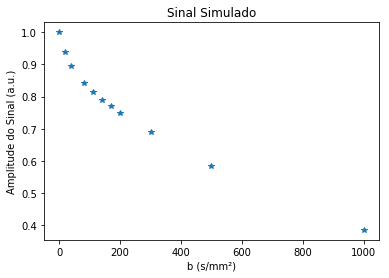

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

#b = [0, 10, 20, 30, 40, 50, 100, 200, 400, 800]
b = [0, 20, 40, 80, 110, 140, 170, 200, 300, 500, 1000]

def plotCurve(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    #plt.plot(b, sinalF/sinalF[0], ".-")
    plt.plot(b, sinal/sinal[0], "*")
    plt.title('Sinal Simulado')
    plt.xlabel('b (s/mm²)')
    plt.ylabel('Amplitude do Sinal (a.u.)')
    plt.show()
    
def plotCurveR(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    plt.plot(b, sinalF/sinalF[0], ".-")
    plt.plot(b, sinalR/sinalR[0], "*")
    plt.show()
    
########################################
# Cérebro
# Saudável
d = 0.832e-3
de = 26.8e-3
f = 0.115

# Com Tumor
dT = 1.63e-3
deT = 7.23e-3
fT = 0.0953

########################################
# Renal
# Saudável
#d = 2.4e-3
#de = 11.1e-3
#f = 6.1e-2

# Com Lesão
#dT = 1.47e-3
#deT = 14.1e-3
#fT = 27.9e-2

########################################
# Fígado
# Saudável - Direito
#d = 1.16e-3
#de = 85.1e-3
#f = 0.26

# Cirrótico - Direito
#dT = 1.27e-3
#deT = 57.4e-3
#fT = 0.31

# Saudável - Esquerdo
#d = 1.02e-3
#de = 71e-3
#f = 0.31

# Cirrótico - Esquerdo
#dT = 1.04e-3
#deT = 64.7e-3
#fT = 0.29
########################################
# Teste
# Saudável
#d = 2.4e-3
#de = 11.1e-3
#f = 6.1e-2

# Com Lesão
#dT = 1.47e-3
#deT = 14.1e-3
#fT = 27.9e-2
########################################

random.seed()
a = random.gauss(0.6, 0.1)
    
sinal = []
for element in b:
    sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))
    
sinalT = []
for element in b:
    sinalT.append(a*(fT*np.exp(-element*deT) + (1-fT)*np.exp(-element*dT)))
    
sinal = sinal/sinal[0]
sinalT = sinalT/sinal[0]
    
plotCurve(d, de, f)

# 0 Ruído

Riciano:  30.88422661455871


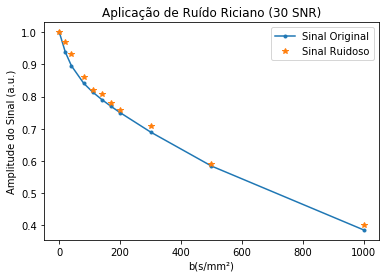

In [15]:
#Definição de SNR
SNRs = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
SNR = 30
meanSNR = 0

def getSNR(signal, noise):
    #mean = np.mean(signal)
    #sd = np.std(noise)
    sumS = 0
    sumN = 0
    for i in range(len(signal)):
        sumS += signal[i]*signal[i]
        sumN += noise[i]*noise[i]
    return (10*np.log10(sumS/sumN))


# Ruído Riciano
def createRici(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinal)))**2 + (np.random.normal(0, sd, len(sinal)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

def createRiciT(SNR):
    global meanSNR
    sd = np.mean(sinalT)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinalT)))**2 + (np.random.normal(0, sd, len(sinalT)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinalT + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

# Ruído Gaussiano
def createRui(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/20))
    #print(sd)
    noise = np.random.normal(0, sd, len(sinal))
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    #print(SNR)
    meanSNR += SNR/1000
    return sinalR

meanSNR = 0
for k in range(1000):
    sinalR1 = createRici(SNR)
print("Riciano: ",meanSNR)

meanSNR = 0
for k in range(1000):
    sinalR2 = createRui(SNR)
#print("Gaussiano: ", meanSNR)

plt.plot(b, sinal/sinal[0], ".-")
plt.plot(b, sinalR1/sinalR1[0], "*")
plt.title('Aplicação de Ruído Riciano (' + str(SNR) +' SNR)')
plt.xlabel('b(s/mm²)')
plt.ylabel('Amplitude do Sinal (a.u.)')
plt.gca().legend(('Sinal Original','Sinal Ruidoso'))
#pylab.legend(loc='upper right')

#plt.plot(b, sinalR2/sinalR2[0], "o")

# 1 Parameter Fitting Method

Valores esperados: 0.000832 0.0268 0.115
Estimativa Aritmética:
d: 0.000832133938675595
Estimativa com Mono Exponencial:
de: 0.026863200203433458
f: 0.11488145633287805


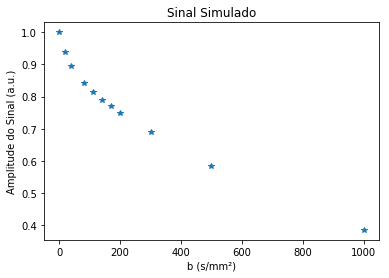

In [3]:
from lmfit import Minimizer, Parameters, report_fit

print("Valores esperados:", d, de, f)

# Estimativa com aritmética
print("Estimativa Aritmética:")
d1 = np.log(sinal[7]/sinal[8])/(b[8]-b[7])
d2 = np.log(sinal[8]/sinal[9])/(b[9]-b[8])
d3 = np.log(sinal[9]/sinal[10])/(b[10]-b[9])
dEst = abs((d2+d3)/2)
print("d: " + str(dEst))

print("Estimativa com Mono Exponencial:")
# Estimativa com mono exponencial
# Utiliza-se a função monoexponencial do ponto futuro dividido pelo atual para cancelamento de f
# Dessa forma, o vetor de entradas é delta B (b(i + 1) - b(i)) e a função é de sinal(i)/sinal(i+1)

# Página 3 do artigo Evaluation of Intravoxel Incoherent - Deduzido a partir da fórmula original
fEst = abs(1 - sinal[10]*np.exp(b[10]*dEst))

# Estimativa de d*
def func4(params, x, data):
    de = params['de']
    model = (fEst*np.exp(-x * de) + (1-fEst)*np.exp(-x * dEst))
    return (model - data)

data = np.empty(0)
x = np.empty(0)

for i in range(0,10):
    data = np.append(data, sinal[i])
    x = np.append(x, b[i])

params = Parameters()
params.add('de', value=0)

minner = Minimizer(func4, params, fcn_args=(x, data))
estR = minner.minimize()
deEst = abs(estR.params['de'].value)

print("de: " + str(deEst))
print("f: " + str(fEst))

plotCurve(dEst, deEst, fEst)

# 2 Parameter Fitting Method

Valores esperados: 0.000832 0.0268 0.115
Estimativa Aritmética:
d: 0.000832133938675595
f: 0.11499449502684947
de: 0.02676878005392445


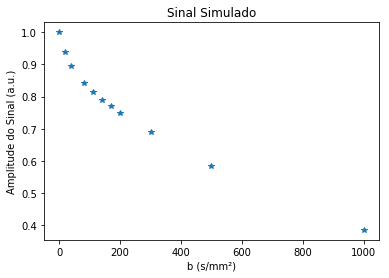

In [4]:
print("Valores esperados:", d, de, f)

# Estimativa com aritmética
print("Estimativa Aritmética:")
#d1 = np.log(sinal[7]/sinal[8])/(b[8]-b[7])
#print("d: " + str(d1))
d2 = np.log(sinal[8]/sinal[9])/(b[9]-b[8])
#print("d: " + str(d2))
d3 = np.log(sinal[9]/sinal[10])/(b[10]-b[9])
#print("d: " + str(d3))
dEst = abs((d2+d3)/2)
print("d: " + str(dEst))

#dEst = 0.00083

# Estimativa de d* e f
def func4(params, x, data):
    de = params['de']
    f = params['f']
    model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * dEst))
    return (model - data)

data = np.empty(0)
x = np.empty(0)

for i in range(0,10):
    data = np.append(data, sinal[i])
    x = np.append(x, b[i])

params = Parameters()
params.add('de', value=1)
params.add('f', value=0)

minner = Minimizer(func4, params, fcn_args=(x, data))
estR = minner.minimize(method='nnls')
deEst = abs(estR.params['de'].value)
fEst = abs(estR.params['f'].value)

print("f: " + str(fEst))
print("de: " + str(deEst))

plotCurve(dEst, deEst, fEst)

# 3 Paramether Fitting Method

Valores esperados: 0.000832 0.0268 0.115
d: 0.0008320000000000001
f: 0.11499999999999994
de: 0.026799999999999987


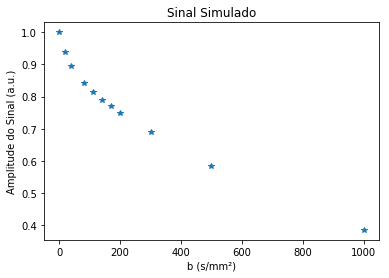

In [5]:
print("Valores esperados:", d, de, f)
# Fit d, d* e f
def func5(params, x, data):
    d = params['d']
    de = params['de']
    f = params['f']
    model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * d))
    return (model - data)

data = np.empty(0)
x = np.empty(0)

for i in range(0,11):
    data = np.append(data, sinal[i])
    x = np.append(x, b[i])

# Tem problematização na inicialização dos parametros    
params = Parameters()
params.add('d', value=0)
params.add('de', value=0)
params.add('f', value=0.1)
    
minner = Minimizer(func5, params, fcn_args=(x, data))
estR = minner.minimize()
dEst = abs(estR.params['d'].value)
deEst = abs(estR.params['de'].value)
fEst = abs(estR.params['f'].value)

print("d: " + str(dEst))
print("f: " + str(fEst))
print("de: " + str(deEst))

plotCurve(dEst, deEst, fEst)

# 1 Parameter Fitting Method - Ruido

In [6]:
from lmfit import Minimizer, Parameters, report_fit

print("Valores esperados:", d, de, f)
erroVec1 = list()
d1prg = list()
de1prg = list()
f1prg = list()

def remove_last_element(arr):
    return arr[np.arange(arr.size - 1)]

for SNR in SNRs[1:]:
    d1pr = np.empty(0)
    de1pr = np.empty(0)
    f1pr = np.empty(0)
    errom = 0
    k = 0
    nconv = 0
    success = True

    dMed1 = 0
    dMed2 = 0
    while (k <= 1000):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]
            
            # Estimativa com aritmética
            d1 = np.log(sinalR[7]/sinalR[8])/(b[8]-b[7])
            d2 = np.log(sinalR[8]/sinalR[9])/(b[9]-b[8])
            d3 = np.log(sinalR[9]/sinalR[10])/(b[10]-b[9])
            dEst = (d2+d3)/2
            d1pr = np.append(d1pr, dEst)

            #print("Estimativa com Mono Exponencial:")
            # Estimativa com mono exponencial
            # Utiliza-se a função monoexponencial do ponto futuro dividido pelo atual para cancelamento de f
            # Dessa forma, o vetor de entradas é delta B (b(i + 1) - b(i)) e a função é de sinalR(i)/sinalR(i+1)

            # Página 3 do artigo Evaluation of Intravoxel Incoherent - Deduzido a partir da fórmula original
            fEst = abs(1 - sinalR[10]*np.exp(b[10]*dEst))
            f1pr = np.append(f1pr, fEst)

            # Estimativa de d*
            def func4(params, x, data):
                de = params['de']
                model = (fEst*np.exp(-x * de) + (1-fEst)*np.exp(-x * dEst))
                return (model - data)

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('de', value=0)

            minner = Minimizer(func4, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            deEst = abs(estR.params['de'].value)

            if (deEst > 0.05):
                NaoConvergiu

            de1pr = np.append(de1pr, deEst)

            k = k + 1
            
            # Calcular erro
            erro1 = 0
            erro2 = 0
            erro3 = 0
            for element in d1pr:
                erro1 = erro1 + abs(element/d-1)**2
            for element in de1pr:
                erro2 = erro2 + abs(element/de-1)**2
            for element in f1pr:
                erro3 = erro3 + abs(element/f-1)**2
                
            erro = (((1/d)*erro1) + ((1/de)*erro2) + ((1/f)*erro3))**0.5
            errom = errom + erro/1000
        except:
            if (len(de1pr) > len(f1pr)):
                de1pr = remove_last_element(de1pr) 
                d1pr = remove_last_element(d1pr) 
            if (len(d1pr) > len(de1pr)):
                d1pr = remove_last_element(d1pr) 
                
            nconv = nconv + 1
            if(nconv > 1000):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                print(d1pr)
                print(de1pr)
                print(f1pr)
                success = False;
                break
                
    d1prg.append(d1pr)
    de1prg.append(de1pr)
    f1prg.append(f1pr)       
    print("Com SNR = ", SNR)

    if (success):
        erroVec1.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'd': Média ("+ str(np.mean(d1pr)) +")")
        print("2 - Parâmetro 'd*': Média ("+ str(np.mean(de1pr)) +")")
        print("3 - Parâmetro 'f': Média ("+ str(np.mean(f1pr)) +")")

        print("\nNão houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Valores esperados: 0.000832 0.0268 0.115
Com SNR =  25
Erro:  613.1639103890469
1 - Parâmetro 'd': Média (0.0015070257723895516)
2 - Parâmetro 'd*': Média (0.010572972002680356)
3 - Parâmetro 'f': Média (0.09474226432318097)

Não houve convergência em 0.13119026933101652% dos casos.
Com SNR =  30
Erro:  657.8720078606348
1 - Parâmetro 'd': Média (0.0015727027294190434)
2 - Parâmetro 'd*': Média (0.01359863142858332)
3 - Parâmetro 'f': Média (0.06965671379238789)

Não houve convergência em 0.13494809688581316% dos casos.
Com SNR =  35
Erro:  696.1643759491063
1 - Parâmetro 'd': Média (0.001617497179261236)
2 - Parâmetro 'd*': Média (0.015299238738113619)
3 - Parâmetro 'f': Média (0.06072020644070272)

Não houve convergência em 0.08172635445362718% dos casos.
Com SNR =  40
Erro:  717.1270370132154
1 - Parâmetro 'd': Média (0.0016428246733680007)
2 - Parâmetro 'd*': Média (0.01368990037293781)
3 - Parâmetro 'f': Média (0.06136251834178874)

Não houve convergência em 0.0029910269192422734%

Upper and Lower Whiskers:  0.0014157768929931131 0.0015943032933068149
Upper and Lower Whiskers:  0.004735782014924229 0.012782793248315251
Upper and Lower Whiskers:  0.04219099421652345 0.13632820021360506
[613.1639103890469, 657.8720078606348, 696.1643759491063, 717.1270370132154, 728.1905096085015, 734.2533553633552, 736.9871653812738, 738.9060339900589, 739.6328294748859, 740.0454562271715]


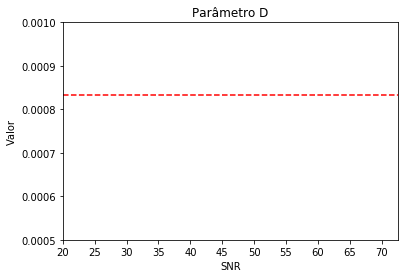

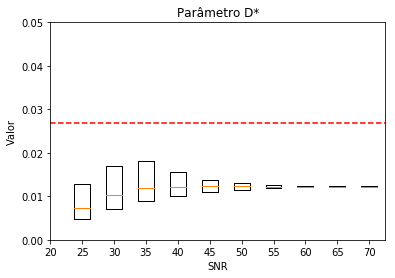

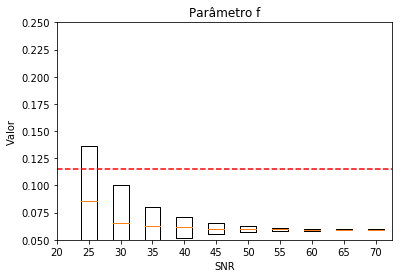

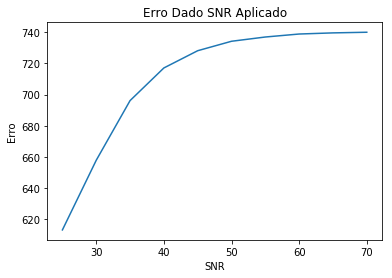

In [7]:
rangeMed = 100

plt.figure()
bp = plt.boxplot(d1prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([d for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.5*10**-3, 1*10**-3))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D')
plt.xlabel('SNR')
plt.ylabel('Valor')

plt.figure()
bp = plt.boxplot(de1prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([de for i in range(rangeMed)])
plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D*')
plt.xlabel('SNR')
plt.ylabel('Valor')
#print("Mediana:", np.median(de3pr))

plt.figure()
bp = plt.boxplot(f1prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([f for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.05, 0.25))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro f')
plt.xlabel('SNR')
plt.ylabel('Valor')

plt.figure()
plt.plot(SNRs[1:], erroVec1)
plt.title('Erro Dado SNR Aplicado')
plt.xlabel('SNR')
plt.ylabel('Erro')

print(erroVec1)

# 2 Parameter Fitting Method - Ruido

In [8]:
print("Valores esperados:", d, de, f)
erroVec2 = list()
d2prg = list()
de2prg = list()
f2prg = list()

for SNR in SNRs[1:]:
    d2pr = np.empty(0)
    de2pr = np.empty(0)
    f2pr = np.empty(0)

    errom = 0
    k = 0
    nconv = 0
    success = True
    while (k <= 1000):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]
            
            # Estimativa com aritmética
            d1 = np.log(sinalR[7]/sinalR[8])/(b[8]-b[7])
            d2 = np.log(sinalR[8]/sinalR[9])/(b[9]-b[8])
            d3 = np.log(sinalR[9]/sinalR[10])/(b[10]-b[9])
            dEst = abs((d2+d3)/2)
            
            d2pr = np.append(d2pr, dEst)

            # Estimativa de d* e f
            def func4(params, x, data):
                de = params['de']
                f = params['f']
                model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * dEst))
                return (model - data)

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,10):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('de', value=0.3) #!
            params.add('f', value=0)

            minner = Minimizer(func4, params, fcn_args=(x, data))
            estR = minner.minimize()

            deEst = abs(estR.params['de'].value)
            fEst = abs(estR.params['f'].value)

            de2pr = np.append(de2pr, deEst)
            f2pr = np.append(f2pr, fEst)

            k = k + 1
            # Calcular erro
            erro1 = 0
            erro2 = 0
            erro3 = 0
            for element in d2pr:
                erro1 = erro1 + abs(element/d-1)**2
            for element in de2pr:
                erro2 = erro2 + abs(element/de-1)**2
            for element in f2pr:
                erro3 = erro3 + abs(element/f-1)**2
                
            erro = (((1/d)*erro1) + ((1/de)*erro2) + ((1/f)*erro3))**0.5
            errom = errom + erro/1000
        except:
            if (len(de1pr) > len(f1pr)):
                de1pr.remove(deEst)
                d1pr.remove(dEst)
            if (len(d1pr) > len(de1pr)):
                d1pr.remove(dEst) 
                
            nconv = nconv + 1
            raise
            if(nconv > 1000):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                print(d2pr)
                print(de2pr)
                print(f2pr)
                success = False;
                break

    d2prg.append(d2pr)
    de2prg.append(de2pr)
    f2prg.append(f2pr)                
    print("Com SNR = ", SNR)

    if (success):
        erroVec2.append(errom)
        print("Erro: ", errom)
        
        print("1 - Parâmetro 'd': Média ("+ str(np.mean(d2pr)) +")")
        print("2 - Parâmetro 'd*': Média ("+ str(np.mean(de2pr)) +")")
        print("3 - Parâmetro 'f': Média ("+ str(np.mean(f2pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Valores esperados: 0.000832 0.0268 0.115
Com SNR =  25
Erro:  27708.104413439833
1 - Parâmetro 'd': Média (0.001514788260822731)
2 - Parâmetro 'd*': Média (0.06520340693275914)
3 - Parâmetro 'f': Média (11.461346970059017)
Não houve convergência em 0.0% dos casos.
Com SNR =  30
Erro:  4553.245371521324
1 - Parâmetro 'd': Média (0.001579062705150451)
2 - Parâmetro 'd*': Média (0.012595314559028365)
3 - Parâmetro 'f': Média (0.6526589451520837)
Não houve convergência em 0.0% dos casos.
Com SNR =  35
Erro:  700.1545046384476
1 - Parâmetro 'd': Média (0.0016201640989696568)
2 - Parâmetro 'd*': Média (0.008288675211938601)
3 - Parâmetro 'f': Média (0.08887838909772686)
Não houve convergência em 0.0% dos casos.
Com SNR =  40
Erro:  720.312518992413
1 - Parâmetro 'd': Média (0.00164318882650419)
2 - Parâmetro 'd*': Média (0.008321713480497444)
3 - Parâmetro 'f': Média (0.08168412931750774)
Não houve convergência em 0.0% dos casos.
Com SNR =  45
Erro:  731.0949281203973
1 - Parâmetro 'd': Médi

Upper and Lower Whiskers:  0.0014178693886351618 0.001604565480156046
Upper and Lower Whiskers:  0.00408769472506371 0.01632341247355424
Upper and Lower Whiskers:  0.06648147162836447 0.20519077407317637
[27708.104413439833, 4553.245371521324, 700.1545046384476, 720.312518992413, 731.0949281203973, 735.2762952700126, 738.8064087393822, 740.4536018580018, 741.2711779915423, 741.7267123218362]


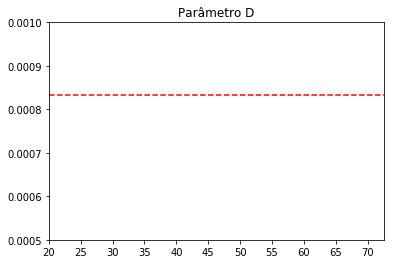

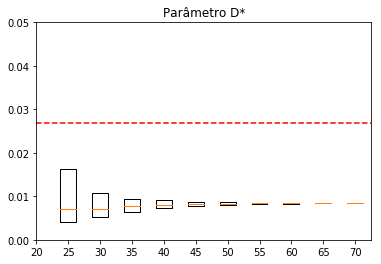

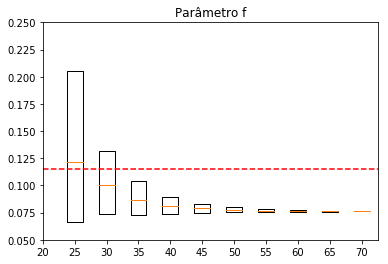

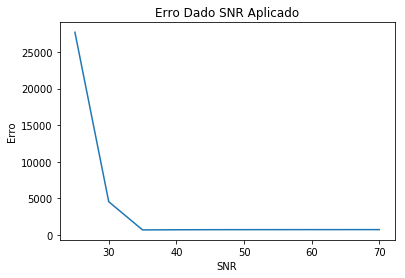

In [9]:
rangeMed = 100

plt.figure()
bp = plt.boxplot(d2prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([d for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.5*10**-3, 1*10**-3))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D')

plt.figure()
bp = plt.boxplot(de2prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([de for i in range(rangeMed)])
plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D*')
#print("Mediana:", np.median(de3pr))

plt.figure()
bp = plt.boxplot(f2prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([f for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.05, 0.25))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro f')

plt.figure()
plt.plot(SNRs[1:], erroVec2)
plt.title('Erro Dado SNR Aplicado')
plt.xlabel('SNR')
plt.ylabel('Erro')

print(erroVec2)

# 3 Paramether Fitting Method - Ruido

In [10]:
print("Valores esperados:", d, de, f)
erroVec3 = list()
d3prg = list()
de3prg = list()
f3prg = list()

for SNR in SNRs[1:]:
    d3pr = np.empty(0)
    de3pr = np.empty(0)
    f3pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= 1000):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]
            # Fit d, d* e f
            def func5(params, x, data):
                d = params['d']
                de = params['de']
                f = params['f']
                model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * d))
                return (model - data)

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            # Tem problematização na inicialização dos parametros    
            params = Parameters()
            params.add('d', value=0)
            params.add('de', value=0)
            params.add('f', value=0.1)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            dEst = abs(estR.params['d'].value)
            deEst = abs(estR.params['de'].value)
            fEst = abs(estR.params['f'].value)

            #print("d: " + str(dEst))
            #print("f: " + str(fEst))
            #print("de: " + str(deEst))
            d3pr = np.append(d3pr, dEst)
            de3pr = np.append(de3pr, deEst)
            f3pr = np.append(f3pr, fEst) 

            #plotCurve(dEst, deEst, fEst)
            k = k + 1
            # Calcular erro
            erro1 = 0
            erro2 = 0
            erro3 = 0
            for element in d3pr:
                erro1 = erro1 + abs(element/d-1)**2
            for element in de3pr:
                erro2 = erro2 + abs(element/de-1)**2
            for element in f3pr:
                erro3 = erro3 + abs(element/f-1)**2
                
            erro = ((erro1) + ((1/de)*erro2) + ((1/f)*erro3))**0.5
            errom = errom + erro/1000
            
        except:
            nconv = nconv + 1
            if(nconv > 1000):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                print(d3pr)
                print(de3pr)
                print(f3pr)
                success = False;
                break

    d3prg.append(d3pr)
    de3prg.append(de3pr)
    f3prg.append(f3pr)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'd': Média ("+ str(np.mean(d3pr)) +")")
        print("2 - Parâmetro 'd*': Média ("+ str(np.mean(de3pr)) +")")
        print("3 - Parâmetro 'f': Média ("+ str(np.mean(f3pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Valores esperados: 0.000832 0.0268 0.115
Com SNR =  25
Erro:  1532.0118234680313
1 - Parâmetro 'd': Média (0.004204081770873362)
2 - Parâmetro 'd*': Média (0.0316372500352515)
3 - Parâmetro 'f': Média (0.4346520008292992)
Não houve convergência em 0.0% dos casos.
Com SNR =  30
Erro:  396.6012709016712
1 - Parâmetro 'd': Média (0.0017349228410102444)
2 - Parâmetro 'd*': Média (0.011379019597495321)
3 - Parâmetro 'f': Média (0.2794051785204735)
Não houve convergência em 0.0% dos casos.
Com SNR =  35
Erro:  133.5177331331729
1 - Parâmetro 'd': Média (0.0017028160041686641)
2 - Parâmetro 'd*': Média (0.006989989095622095)
3 - Parâmetro 'f': Média (0.16525780153651382)
Não houve convergência em 0.0% dos casos.
Com SNR =  40
Erro:  105.78738614743924
1 - Parâmetro 'd': Média (0.0016198197496851785)
2 - Parâmetro 'd*': Média (0.007015345170445603)
3 - Parâmetro 'f': Média (0.11511459696419751)
Não houve convergência em 0.0% dos casos.
Com SNR =  45
Erro:  97.6641487503558
1 - Parâmetro 'd': M

Upper and Lower Whiskers:  0.0011927004035195191 0.001633514726602967
Upper and Lower Whiskers:  0.00209330782627297 0.011810171702517143
Upper and Lower Whiskers:  0.08936955932548483 0.864606221898343
[1532.0118234680313, 396.6012709016712, 133.5177331331729, 105.78738614743924, 97.6641487503558, 97.1846319692524, 97.18208842933237, 97.13101038408115, 97.04302183658453, 97.01313522164733]


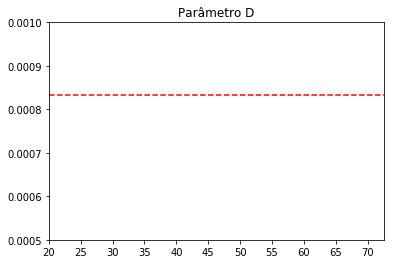

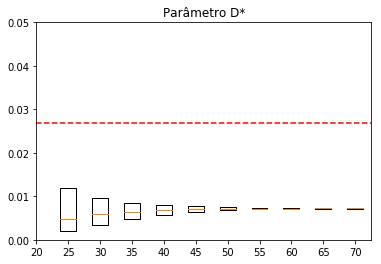

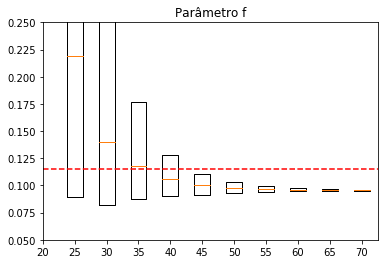

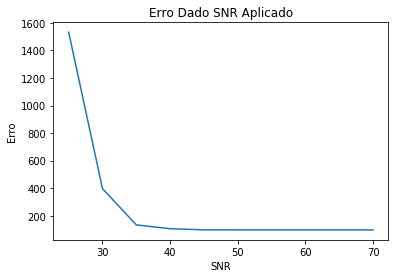

In [11]:
rangeMed = 100

plt.figure()
bp = plt.boxplot(d3prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([d for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.5*10**-3, 1*10**-3))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D')

plt.figure()
bp = plt.boxplot(de3prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([de for i in range(rangeMed)])
plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro D*')
#print("Mediana:", np.median(de3pr))

plt.figure()
bp = plt.boxplot(f3prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([f for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.05, 0.25))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro f')

plt.figure()
plt.plot(SNRs[1:], erroVec3)
plt.title('Erro Dado SNR Aplicado')
plt.xlabel('SNR')
plt.ylabel('Erro')
print(erroVec3)

Upper and Lower Whiskers:  0.0014157768929931131 0.0015943032933068149
Upper and Lower Whiskers:  0.004735782014924229 0.012782793248315251
Upper and Lower Whiskers:  0.04219099421652345 0.13632820021360506


Text(0, 0.5, 'f')

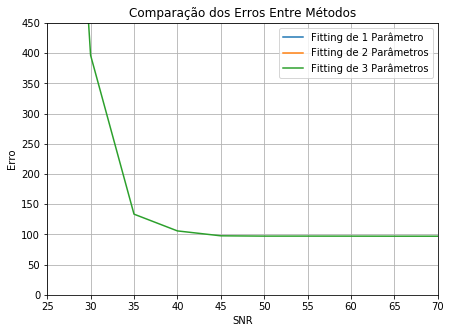

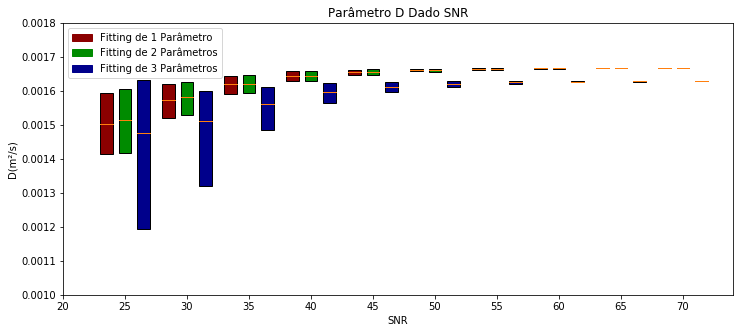

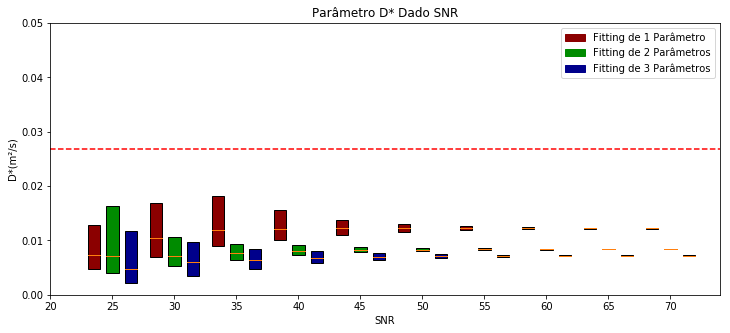

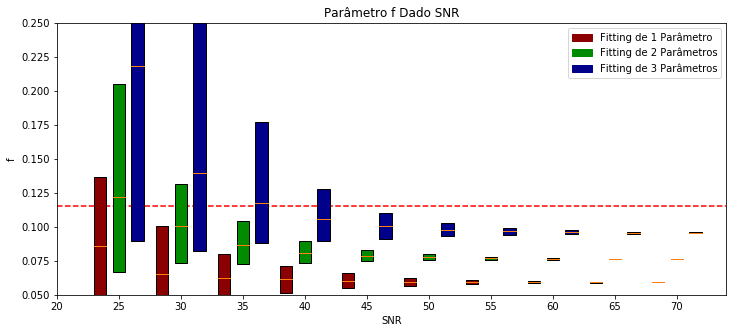

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

patch1 = mpatches.Patch(color='#8B0000', label='Fitting de 1 Parâmetro')
patch2 = mpatches.Patch(color='#008B00', label='Fitting de 2 Parâmetros')
patch3 = mpatches.Patch(color='#00008B', label='Fitting de 3 Parâmetros')

plt.figure(figsize=(7,5))
plt.plot(SNRs[1:], erroVec1)
plt.plot(SNRs[1:], erroVec2)
plt.plot(SNRs[1:], erroVec3)
plt.grid()
plt.xlim((25, 70))
plt.ylim((0, 450))
plt.xlabel('SNR')
plt.ylabel('Erro')
plt.title('Comparação dos Erros Entre Métodos')
plt.legend(['Fitting de 1 Parâmetro', 'Fitting de 2 Parâmetros', 'Fitting de 3 Parâmetros'])

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(d1prg, showfliers=False, whis=0, widths = 0.2, positions=[x-0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(d2prg, showfliers=False, whis=0, widths = 0.2, positions=[x for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp3 = plt.boxplot(d3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)                                                             
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([d for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')
for box in bp3['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#00008B')

plt.legend(handles=[patch1, patch2, patch3])
plt.title('Parâmetro D Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D(m²/s)')

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(de1prg, showfliers=False, whis=0, widths = 0.2, positions=[x-0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(de2prg, showfliers=False, whis=0, widths = 0.2, positions=[x for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp3 = plt.boxplot(de3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)                                                             
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([de for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')
for box in bp3['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#00008B')

plt.legend(handles=[patch1, patch2, patch3])
plt.title('Parâmetro D* Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D*(m²/s)')

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(f1prg, showfliers=False, whis=0, widths = 0.2, positions=[x-0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(f2prg, showfliers=False, whis=0, widths = 0.2, positions=[x for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp3 = plt.boxplot(f3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.3 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)                                                             
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
horiz_line_data = np.array([f for i in range(rangeMed)])
plt.plot(range(rangeMed), horiz_line_data, 'r--')
plt.ylim((0.05, 0.25))
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')
for box in bp3['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#00008B')

plt.legend(handles=[patch1, patch2, patch3])
plt.title('Parâmetro f Dado SNR')
plt.xlabel('SNR')
plt.ylabel('f')

In [33]:
print("Valores esperados:", d, de, f)
erroVec3 = list()
d3prg = list()
de3prg = list()
f3prg = list()

for SNR in SNRs[1:]:
    d3pr = np.empty(0)
    de3pr = np.empty(0)
    f3pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= 100):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]
            # Fit d, d* e f
            def func5(params, x, data):
                d = params['d']
                de = params['de']
                f = params['f']
                model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * d))
                return (model - data)

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            # Tem problematização na inicialização dos parametros    
            params = Parameters()
            params.add('d', value=0)
            params.add('de', value=0)
            params.add('f', value=0.1)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            dEst = abs(estR.params['d'].value)
            deEst = abs(estR.params['de'].value)
            fEst = abs(estR.params['f'].value)

            #print("d: " + str(dEst))
            #print("f: " + str(fEst))
            #print("de: " + str(deEst))
            d3pr = np.append(d3pr, dEst)
            de3pr = np.append(de3pr, deEst)
            f3pr = np.append(f3pr, fEst) 

            #plotCurve(dEst, deEst, fEst)
            k = k + 1
            # Calcular erro
            erro1 = 0
            erro2 = 0
            erro3 = 0
            for element in d3pr:
                erro1 = erro1 + abs(element/d-1)**2
            for element in de3pr:
                erro2 = erro2 + abs(element/de-1)**2
            for element in f3pr:
                erro3 = erro3 + abs(element/f-1)**2
                
            erro = ((erro1) + ((1/de)*erro2) + ((1/f)*erro3))**0.5
            errom = errom + erro/100
            
        except:
            nconv = nconv + 1
            if(nconv > 100):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                print(d3pr)
                print(de3pr)
                print(f3pr)
                success = False;
                break

    d3prg.append(d3pr)
    de3prg.append(de3pr)
    f3prg.append(f3pr)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'd': Média ("+ str(np.mean(d3pr)) +")")
        print("2 - Parâmetro 'd*': Média ("+ str(np.mean(de3pr)) +")")
        print("3 - Parâmetro 'f': Média ("+ str(np.mean(f3pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
        
print("Valores esperados:", d, de, f)
erroVec3T = list()
d3prgT = list()
de3prgT = list()
f3prgT = list()

for SNR in SNRs[1:]:
    d3prT = np.empty(0)
    de3prT = np.empty(0)
    f3prT = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= 100):
        try:
            sinalR = createRiciT(SNR)
            sinalR = sinalR/sinalR[0]
            # Fit d, d* e f
            def func5(params, x, data):
                d = params['d']
                de = params['de']
                f = params['f']
                model = (f*np.exp(-x * de) + (1-f)*np.exp(-x * d))
                return (model - data)

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            # Tem problematização na inicialização dos parametros    
            params = Parameters()
            params.add('d', value=0)
            params.add('de', value=0)
            params.add('f', value=0.1)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            dEst = abs(estR.params['d'].value)
            deEst = abs(estR.params['de'].value)
            fEst = abs(estR.params['f'].value)

            #print("d: " + str(dEst))
            #print("f: " + str(fEst))
            #print("de: " + str(deEst))
            d3prT = np.append(d3prT, dEst)
            de3prT = np.append(de3prT, deEst)
            f3prT = np.append(f3prT, fEst) 

            #plotCurve(dEst, deEst, fEst)
            k = k + 1
            # Calcular erro
            erro1 = 0
            erro2 = 0
            erro3 = 0
            for element in d3prT:
                erro1 = erro1 + abs(element/dT-1)**2
            for element in de3prT:
                erro2 = erro2 + abs(element/deT-1)**2
            for element in f3prT:
                erro3 = erro3 + abs(element/fT-1)**2
                
            erro = ((erro1) + ((1/de)*erro2) + ((1/f)*erro3))**0.5
            errom = errom + erro/100
            
        except:
            nconv = nconv + 1
            if(nconv > 100):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                print(d3prT)
                print(de3prT)
                print(f3prT)
                success = False;
                break

    d3prgT.append(d3prT)
    de3prgT.append(de3prT)
    f3prgT.append(f3prT)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'd': Média ("+ str(np.mean(d3pr)) +")")
        print("2 - Parâmetro 'd*': Média ("+ str(np.mean(de3pr)) +")")
        print("3 - Parâmetro 'f': Média ("+ str(np.mean(f3pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 100)) + "% dos casos.")

Valores esperados: 0.000832 0.0268 0.115
Com SNR =  25
Erro:  27.04476071174144
1 - Parâmetro 'd': Média (0.0007707281928546889)
2 - Parâmetro 'd*': Média (0.029623295394645758)
3 - Parâmetro 'f': Média (0.12156970000512558)
Não houve convergência em 0.0% dos casos.
Com SNR =  30
Erro:  10.004736832596432
1 - Parâmetro 'd': Média (0.0008054753678084899)
2 - Parâmetro 'd*': Média (0.026505442896324963)
3 - Parâmetro 'f': Média (0.11290544490761804)
Não houve convergência em 0.0% dos casos.
Com SNR =  35
Erro:  5.620247895761881
1 - Parâmetro 'd': Média (0.000815682758317017)
2 - Parâmetro 'd*': Média (0.027133552961963327)
3 - Parâmetro 'f': Média (0.11635634165752348)
Não houve convergência em 0.0% dos casos.
Com SNR =  40
Erro:  3.313184008018185
1 - Parâmetro 'd': Média (0.000824735608812416)
2 - Parâmetro 'd*': Média (0.02674601552457314)
3 - Parâmetro 'f': Média (0.11464334060149155)
Não houve convergência em 0.0% dos casos.
Com SNR =  45
Erro:  1.83011071521145
1 - Parâmetro 'd': 

Upper and Lower Whiskers:  0.0011955445754662797 0.0016125794402188454
Upper and Lower Whiskers:  0.0024204781412101046 0.010645134549205853
Upper and Lower Whiskers:  0.08068497390801957 0.7318602872468203
0.0007782490516811816
0.0014466740416836012
0.026928404663678344
0.004764938169831361
0.11840359804568776
0.2187168834756728


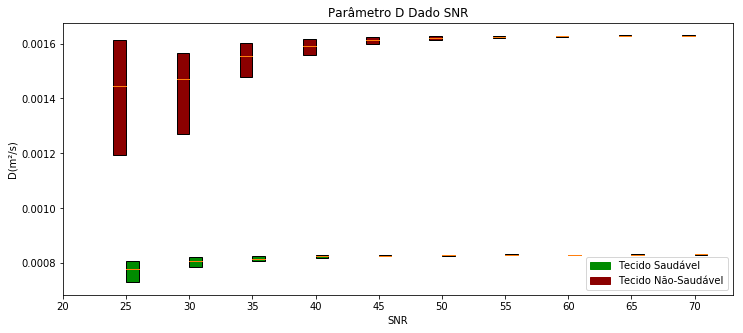

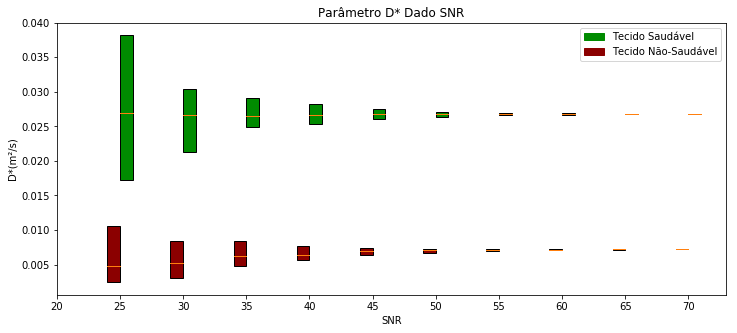

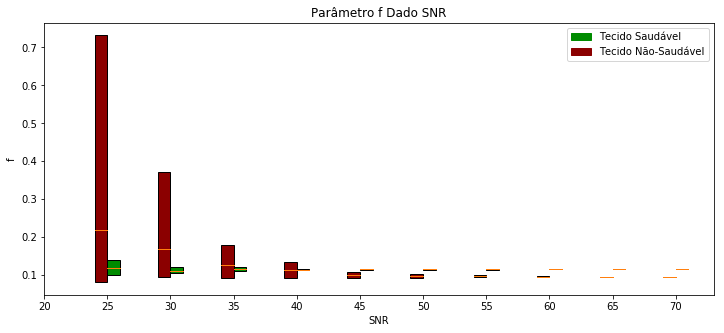

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

patch1 = mpatches.Patch(color='#008B00', label='Tecido Saudável')
patch2 = mpatches.Patch(color='#8B0000', label='Tecido Não-Saudável')
#patch3 = mpatches.Patch(color='#00008B', label='Fitting de 3 Parâmetros')

# Boxplots
# D

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(d3prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(d3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro D Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D(m²/s)')

# DE

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(de3prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(de3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro D* Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D*(m²/s)')

# F

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(f3prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(f3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro f Dado SNR')
plt.xlabel('SNR')
plt.ylabel('f')

print(np.median(d3prg[0]))
print(np.median(d3prgT[0]))

print(np.median(de3prg[0]))
print(np.median(de3prgT[0]))

print(np.median(f3prg[0]))
print(np.median(f3prgT[0]))